1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
#print(iris)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris_class = iris.target
iris_class_2 = pd.DataFrame(iris.target, columns = ['class'])
# a1 = iris_class.rename({'0': 'class'}, axis='columns')
# a2 = iris_class.rename({'0': 'class'}, axis='index')
iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df_iris_sepal = df_iris[['sepal length (cm)', 'sepal width (cm)']]
df_iris_sepal

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
#Просто, чтобы посмотреть, какой записи какой класс соответствует. Этот датафрейм не берем в работу для обучения и получения LDA
df_iris_class = pd.concat([df_iris_sepal, iris_class_2], axis=1)
df_iris_class

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iris, iris_class, test_size=0.25)

In [9]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
lda_iris = LinearDiscriminantAnalysis()

In [11]:
# обучаем данные
lda_iris.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# делаем прогноз на тестовой выборке
lda_iris.predict(X_test)

array([1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2])

In [13]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda_iris.predict(X_test)]).T

In [14]:
result

,0,1
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,2
7,0,0
8,0,0
9,1,1


In [15]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, lda_iris.predict(X_test))

0.9473684210526315

In [17]:
# коэффициенты дискриминатных линий
lda_iris.coef_

array([[  5.35002013,  12.85941234, -17.53287661, -19.4686502 ],
       [ -0.80022281,  -4.6909904 ,   5.05756016,   0.91589558],
       [ -4.40232974,  -8.22909988,  12.35730665,  17.71670645]])

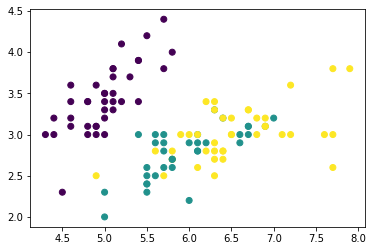

In [18]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [19]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

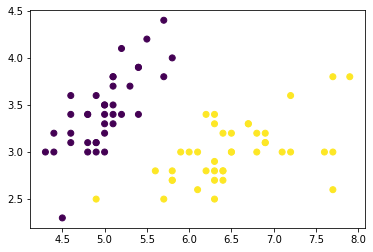

In [20]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [21]:
lda_iris_small = LinearDiscriminantAnalysis()
lda_iris_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [22]:
# посмотрим на наши центроиды
lda_iris_small.means_

array([[5.        , 3.43947368],
       [6.52      , 3.0025    ]])

In [23]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

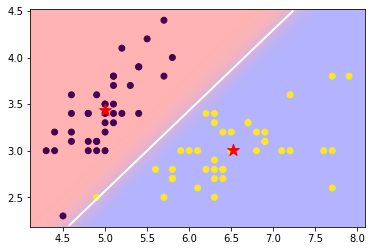

In [24]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_iris_small.means_[:, 0], lda_iris_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_iris_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [25]:
# второй признак и первый признак как соотносятся для кластеризации??? (это видно по визуализации) 
#Из лекции, не поняла, что делать с коэф-тами регрессии.
lda_iris_small.coef_

array([[ 10.22586393, -11.81933531]])

In [26]:
# какая будет точность?
accuracy_score(sy_test, lda_iris_small.predict(small_test))

1.0

In [27]:
df_iris[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Приступаем к кластеризации. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

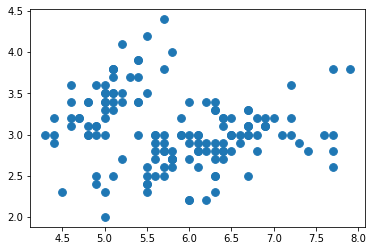

In [28]:
#визуализируем две переменные 'sepal length (cm)', 'sepal length (cm)' из начального датафрейма.
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], cmap='autumn', s=60)
plt.show()

In [29]:
#Делаем то же самое - для массива с именем Х, как в примере. Сначала оставляем в Х только две нужных переменных.
X = df_iris[['sepal length (cm)', 'sepal width (cm)']]
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


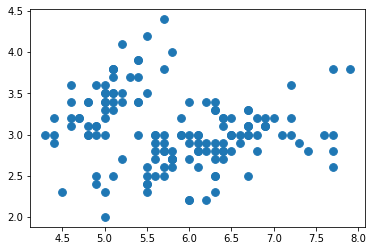

In [30]:
#визуализируем две переменные 'sepal length (cm)', 'sepal length (cm)' из начального датафрейма. Визуализация получилась такой же
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], cmap='autumn', s=60)
plt.show()

In [31]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

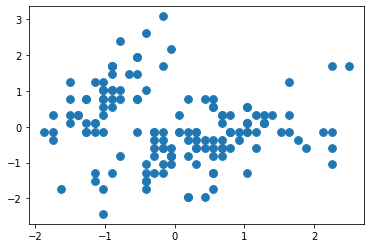

In [34]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [35]:
# Делим на кластеры методом К-средних
from sklearn.cluster import KMeans

In [36]:
# Сначала берем число кластеров - 2
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

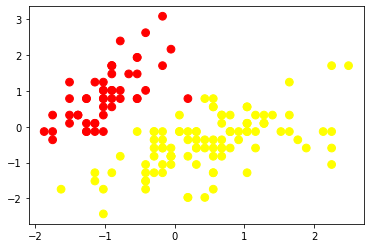

In [37]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [38]:
# строим график локтя для определения значимого количества кластеров

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

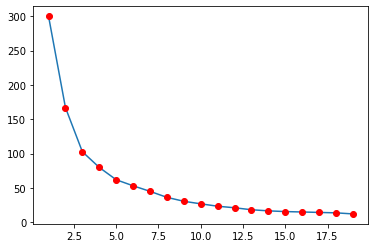

In [39]:
#Как минимум, по методу локтя значимым является разбиение на 5 кластеров
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

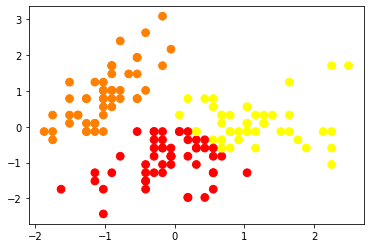

In [40]:
#График для 3 кластеров. 
kmeans_3 = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters_3 = kmeans_3.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters_3, s=60)

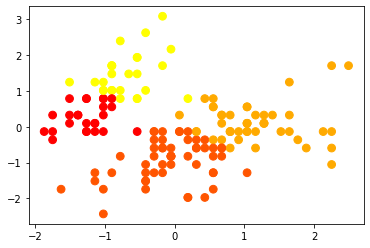

In [41]:
#График для 4 кластеров. 
kmeans_4 = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters_4 = kmeans_4.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters_4, s=60)

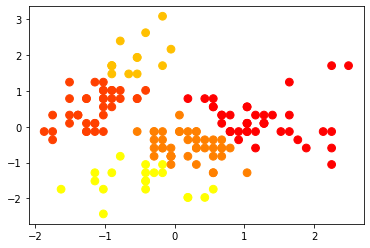

In [42]:
#График для 5 кластеров. 
kmeans_5 = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters_5 = kmeans_5.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters_5, s=60)

In [48]:
df_iris_3_clusters = pd.DataFrame(X)
df_iris_3_clusters['class'] = iris_class
df_iris_3_clusters['clusters'] = clusters_3
df_iris_3_clusters.loc[70:90]

,sepal length (cm),sepal width (cm),class,clusters
70,5.9,3.2,1,2
71,6.1,2.8,1,0
72,6.3,2.5,1,0
73,6.1,2.8,1,0
74,6.4,2.9,1,2
75,6.6,3.0,1,2
76,6.8,2.8,1,2
77,6.7,3.0,1,2
78,6.0,2.9,1,0
79,5.7,2.6,1,0


Лучше выглядит разделение на 2 или 3 кластера.
2 кластера и 2 класса выглядят одинаково. Как это интерпретировать? 
Под 2 классами/кластерами в этом примере получились разделение по показателеям 'sepal length (cm)' и 'sepal width (cm)'?
Посмотрим, к какому классу и кластеру попадает каждая запись/строка таблицы - см. датафрейм выше.  
На мой взгляд, классы и кластеры совсем не совпали. У меня подозрение, что так неверно объединять. Что полученных классов по методу LDA было 2, и они не равны первоначальным трем классам из исходных данных. С интерпретацией классов-кластеров не понятно.
Можно ли, нужно ли давать названия кластерам? Как это делать?
Как "подцепить" названия классам, которые были в описании таблицы iris?